In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import qutip as qt

In [2]:
%load_ext autoreload
%autoreload 2

# Hamiltonians

## General Alice Bob Cavity Hamiltonian

Let the Hamiltonian for Alice (A), Bob (B), and a coupler mode (C), all modeled as cavity modes with annihilation operators $a$, $b$, and $c$ and frequencies $\omega_A$, $\omega_B$, $\omega_C$, be:

$$
H = \omega_A\, a^\dagger a + \omega_B\, b^\dagger b + \omega_C\, c^\dagger c  + g_{AC} (a^\dagger c + a c^\dagger) + g_{BC} (b^\dagger c + b c^\dagger)
$$

where:
- $a$, $b$, $c$ are annihilation operators for Alice, Bob, and the coupler mode,
- $a^\dagger$, $b^\dagger$, $c^\dagger$ are the corresponding creation operators,
- $g_{AC}$, $g_{BC}$ are couplings between Alice/Coupler and Bob/Coupler.

In [3]:
# Parameters for the general Alice-Bob-Cavity Hamiltonian (all units are in MHz)
omega_A = 2 * np.pi * 5e3      # Frequency of Alice's mode
omega_B = 2 * np.pi * 6e3      # Frequency of Bob's mode
omega_C = 2 * np.pi * 4e3      # Frequency of Coupler mode
g_AC = 2 * np.pi * 100         # Coupling between Alice and Coupler
g_BC = 2 * np.pi * 100         # Coupling between Bob and Coupler


## LINC Potential 
$$U = 2M^2E_J \cos{\phi_{ext}}\cos{\theta/M}$$
- $M$: Integer parameter related to the number of junctions or modes in the system  
- $E_J$: Josephson energy  
- $\phi_{ext}$: External flux phase  
- $\theta$: Collective phase variable, e.g., $\theta = \theta_{\mathrm{zpt}} (c + c^\dagger)$  
- $\theta_{\mathrm{zpt}} = (2E_C/E_L)^{1/4}$
- $U$: LINC potential energy

If we set $\phi_{ext} = \frac{\pi}{2} + \phi_{AC}$, then H becomes:
$$
U = 2M^2E_J \sin{\phi_{AC}}\cos{\theta/M}
$$



In [4]:
# Parameters for LINC potential (example values, adjust as needed)
M = 3                # Integer parameter (number of junctions/modes)
E_J = 2 * np.pi * 15e3    # Josephson energy (in appropriate units)
# phi_AC = np.pi / 4   # Phase variable (in radians)
E_C = 2 * np.pi * 100e3   # Charging energy
E_L = 2 * np.pi * 52.8    # Inductive energy


In [5]:
##

## Rough Strategy 
- Go TO RW frame of LINC, and cavities. Effective hamiltonian has the JC terms which gain exponential rotation and so does the E_J term 

- Now for each drive amplitude, find the resonant frequency of the beamsplitter
    - Do this simply be sweeping across different drive frequency and picking the frequency where we see a significant hybridization of alice and bob modes
- At the resonant frequency, extract the kerr using the higher levels (drive induced kerr shift)

In [6]:
from helpers import CouplerHamiltonian


In [69]:
coup_ham = CouplerHamiltonian(
    trunc=5,
    omega_A=omega_A,
    omega_B=omega_B,
    omega_C=omega_C,
    g_AC=0,#g_AC,
    g_BC=0,#g_BC,
    E_C=E_C,
    E_L=E_L,
    E_J=0.0001#E_J
)
omegad = 2 * np.pi * 1e3  # Drive frequency (in MHz)
H = coup_ham.generate_H0_with_couplings(rotating = False)
operator, time_func = coup_ham.linc_potential_operator(omega = omegad)
H +=[[operator, time_func]]
quasienergies, states = coup_ham.floquet_modes(omegad, H)

Initializing CouplerHamiltonian with truncation: 5


In [70]:
quasienergies

array([-5.19650029e-06, -3.58772651e-06, -2.58647858e-06, -2.00380948e-06,
       -1.11022302e-13,  8.36707885e-06,  3.43677007e-05,  3.43677071e-05,
        8.65720099e-05,  1.81531303e-04,  1.81531316e-04,  3.42880645e-04,
        6.03325909e-04,  6.03325923e-04,  1.00694457e-03,  1.00694457e-03,
        1.61181321e-03,  1.61181321e-03,  1.61181322e-03,  2.49297401e-03,
        2.49297402e-03,  3.74575087e-03,  3.74575087e-03,  3.74575090e-03,
        5.48942445e-03,  5.48942446e-03,  7.87127567e-03,  7.87127567e-03,
        7.87127567e-03,  1.10710065e-02,  1.10710065e-02,  1.10710065e-02,
        1.53055481e-02,  1.53055481e-02,  1.53055481e-02,  1.53055482e-02,
        2.08342673e-02,  2.08342673e-02,  2.08342673e-02,  2.79645833e-02,
        2.79645833e-02,  2.79645833e-02,  2.79645833e-02,  3.70580111e-02,
        3.70580111e-02,  4.85366486e-02,  4.85366486e-02,  4.85366486e-02,
        4.85366486e-02,  6.28901291e-02,  6.28901292e-02,  6.28901292e-02,
        6.28901292e-02,  

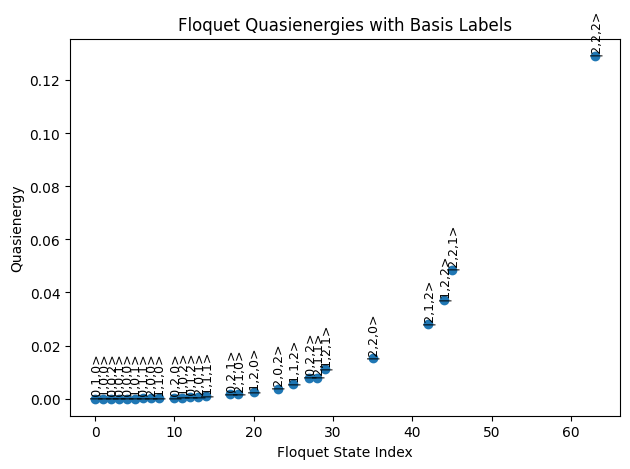

In [72]:
coup_ham.plot_floquet_energies( states, quasienergies)#, title="LINC potential quasienergies")

In [ ]:
energies, modes = coup_ham.compute_states_over_floquet_period(omega =omegad, H = H, num_points = 10)


Computing Floquet states: 100%|██████████| 10/10 [00:37<00:00,  3.71s/it]


66
61
91
36
17
42
31
16
37
32
96
27
2
117
87
112
82
107
77
102
22
47
72
122
97
26
1
1
56
61
6
86
51
76
11
41
56
16
81
91
86
101
106
96
71
111
46
21
92
37
12
17
42
7
12
37
62
27
32
57
52
87
90
121
80
77
70
45
20
95
112
107
117
78
3
28
33
8
38
53
13
64
63
78
68
83
18
43
18
93
120
39
94
84
79
19
14
9
39
44
4
29
34
54
59
63
88
98
103
73
108
23
48
113
118
49
24
73
74
114
119
109
104
123
124


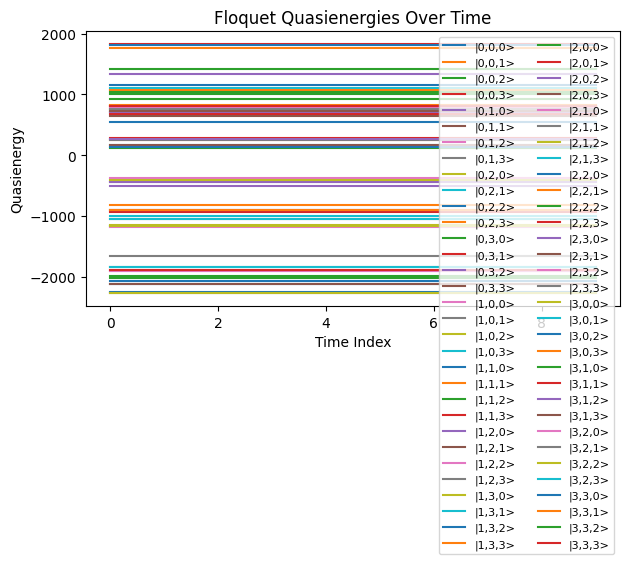

In [62]:
coup_ham.plot_floquet_energies_over_period(energies, modes, max_photons_per_mode=3)

In [ ]:
num_points = len(energies)
keys = big_mapping_list[0].keys()
en_for_state = np.zeros(( len(keys), num_points))
for j, key in enumerate(keys):
    en_for_state[j, :] = [big_mapping_list[i][key] for i in range(num_points)]




{0: 66,
 1: 61,
 2: 91,
 3: 36,
 4: 17,
 5: 42,
 6: 31,
 7: 16,
 8: 37,
 9: 32,
 10: 96,
 11: 27,
 12: 2,
 13: 117,
 14: 87,
 15: 112,
 16: 82,
 17: 107,
 18: 77,
 19: 102,
 20: 22,
 21: 47,
 22: 72,
 23: 122,
 24: 97,
 25: 26,
 26: 1,
 27: 1,
 28: 56,
 29: 61,
 30: 6,
 31: 86,
 32: 51,
 33: 76,
 34: 11,
 35: 41,
 36: 56,
 37: 16,
 38: 81,
 39: 91,
 40: 86,
 41: 101,
 42: 106,
 43: 96,
 44: 71,
 45: 111,
 46: 46,
 47: 21,
 48: 92,
 49: 37,
 50: 12,
 51: 17,
 52: 42,
 53: 7,
 54: 12,
 55: 37,
 56: 62,
 57: 27,
 58: 32,
 59: 57,
 60: 52,
 61: 87,
 62: 90,
 63: 121,
 64: 80,
 65: 77,
 66: 70,
 67: 45,
 68: 20,
 69: 95,
 70: 112,
 71: 107,
 72: 117,
 73: 78,
 74: 3,
 75: 28,
 76: 33,
 77: 8,
 78: 38,
 79: 53,
 80: 13,
 81: 64,
 82: 63,
 83: 78,
 84: 68,
 85: 83,
 86: 18,
 87: 43,
 88: 18,
 89: 93,
 90: 120,
 91: 39,
 92: 94,
 93: 84,
 94: 79,
 95: 19,
 96: 14,
 97: 9,
 98: 39,
 99: 44,
 100: 4,
 101: 29,
 102: 34,
 103: 54,
 104: 59,
 105: 63,
 106: 88,
 107: 98,
 108: 103,
 109: 73,
 110: